In [38]:
# Importing all the necessary Libraries

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 


In [39]:
# Reading the dataset from the system 

dataset_path = "/Users/gaurang/Desktop/CIND_820/online_transactions.csv"

df = pd.read_csv(dataset_path)

df.head() 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [40]:
# Calculating the number of rows and columns in the dataset

num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}") 

Number of rows: 6362620
Number of columns: 11


In [41]:
# Checking the datatypes of all the variables 

print(df.dtypes) 

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [42]:
# Checking the dataset for any missing values (If the answer is True, that means there are missing values and vice versa) 

df.isna().any().any()

False

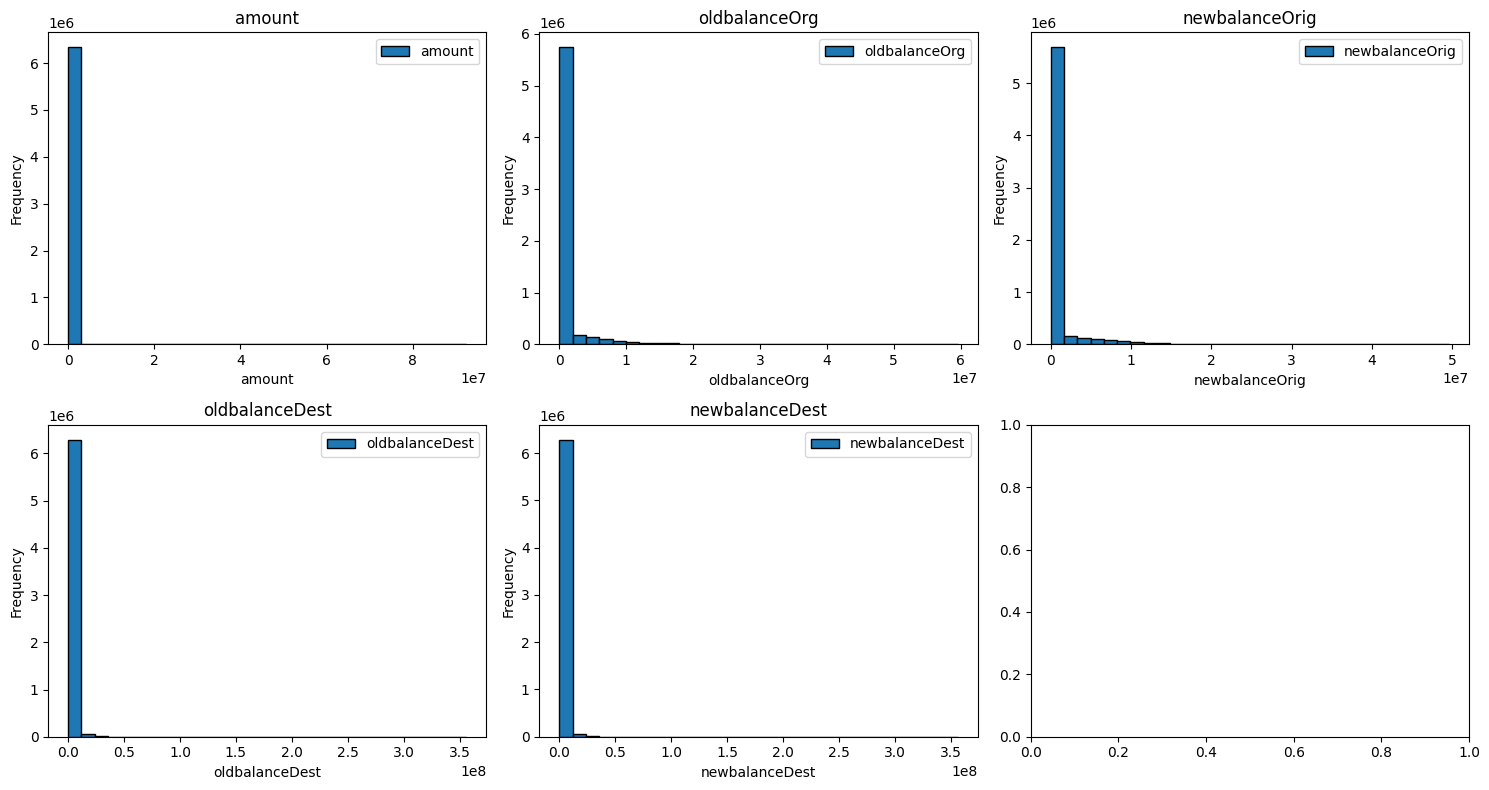

In [43]:
# Plotting Histograms to better understand the numeric variables

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# List of numeric columns to create histograms for
numeric_columns = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

# Creating histograms for each numeric variable
for i, col in enumerate(numeric_columns):
    ax = axes[i // 3, i % 3]
    df[col].plot(kind="hist", bins=30, ax=ax, edgecolor='k', legend=True)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

# Adjusting the layout
plt.tight_layout()
plt.show()


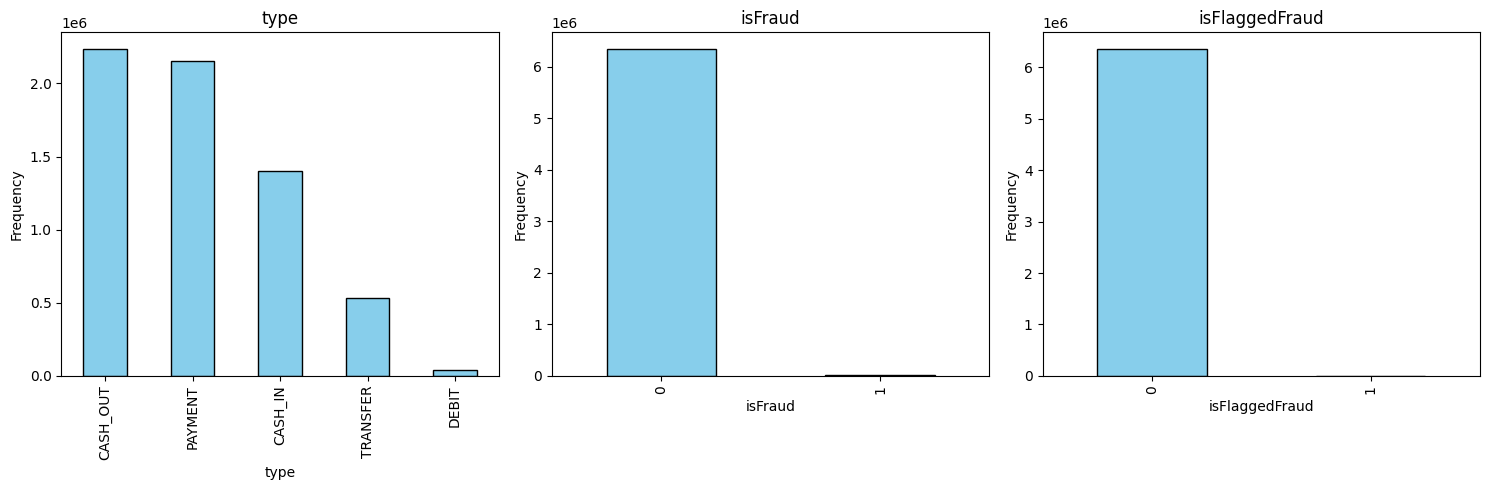

In [44]:
# Plotting Bar Charts to better understand the Categorical variables

# Categorical columns to create bar charts for
categorical_columns = ['type', 'isFraud', 'isFlaggedFraud']

# Creating a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(15, 5))

# Creating bar charts for each categorical variable
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    counts = df[col].value_counts()
    counts.plot(kind="bar", ax=ax, color="skyblue", edgecolor='k', legend=False)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

# Adjusting the layout
plt.tight_layout()
plt.show()


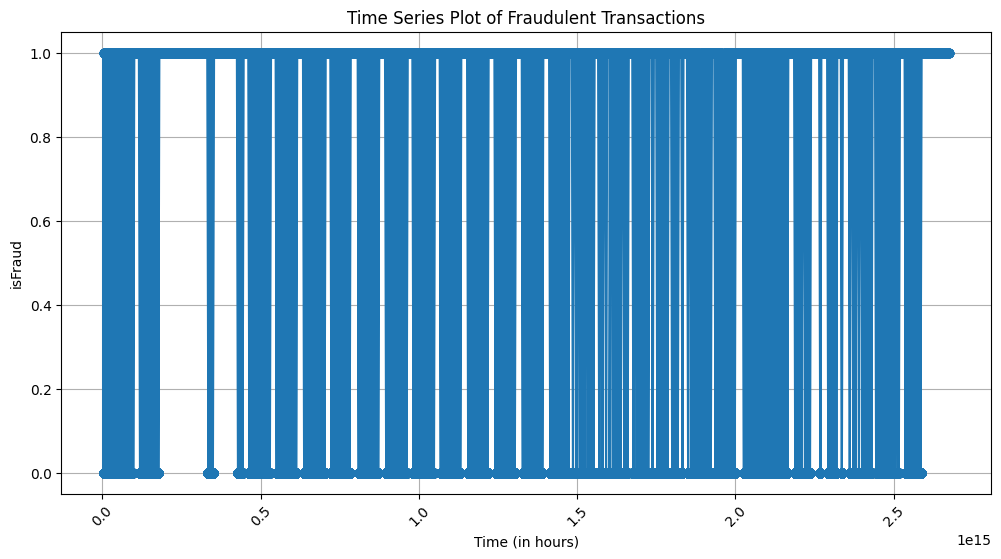

In [45]:
# Creating a Time Series Plot using the "step" variable to better understand the temporal pattern and detect anomalies

# Converting the 'step' variable to a time-based format (e.g., hours)
df['step'] = pd.to_timedelta(df['step'], unit='h')

# Sorting the DataFrame by the 'step' variable
df = df.sort_values(by='step')

# Creating the time series plot
plt.figure(figsize=(12, 6))
plt.plot(df['step'], df['isFraud'], marker='o', linestyle='-')
plt.title('Time Series Plot of Fraudulent Transactions')
plt.xlabel('Time (in hours)')
plt.ylabel('isFraud')
plt.grid(True)
plt.xticks(rotation=45)

# Showing the plot
plt.show()

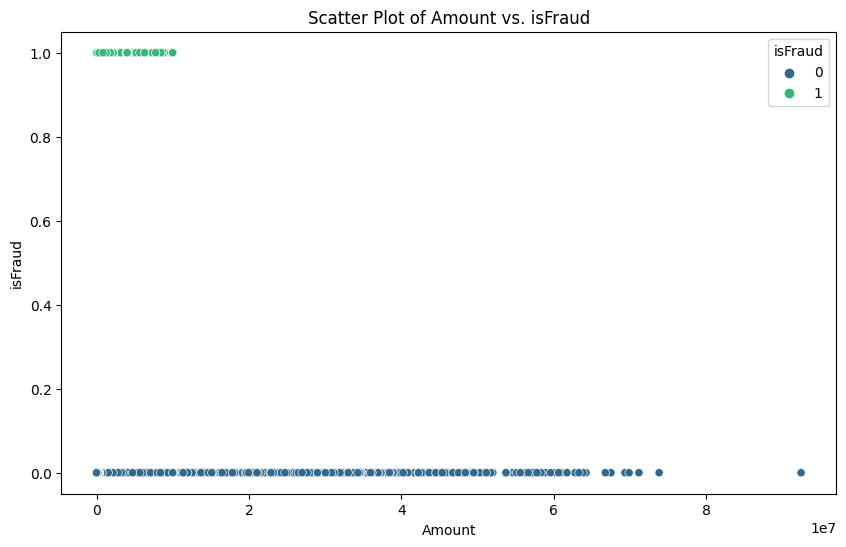

In [46]:
# Creating Scatter Plot to visualize relationship between transaction amounts and whether they are fraud or not

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='amount', y='isFraud', hue='isFraud', palette='viridis')
plt.title('Scatter Plot of Amount vs. isFraud')
plt.xlabel('Amount')
plt.ylabel('isFraud')
plt.show()

In [47]:
# Creating a Correlation Matrix of numerical variables to understand how different features are related to each other
# We can use one-hot encoding to convert the object type variables into numerical variables and then use them in correlation matrix
# However, the dataset is already too large and one-hot encoding increases the dimensionality of the dataset, which will be a problem in executing the code
# Therefore, plotting the correlation matrix of only the numerical features


# Defining a list of variables to remove
variables_to_remove = ['type', 'nameOrig', 'nameDest']

# Useing the drop method to remove the specified variables
df_new = df.drop(variables_to_remove, axis=1)



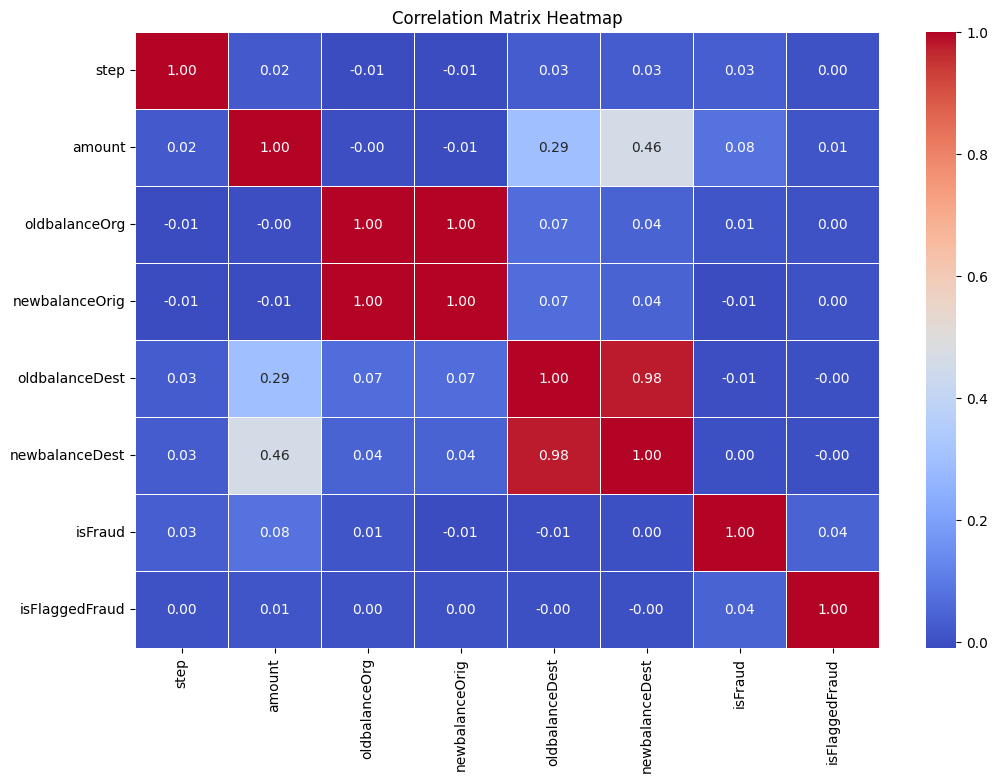

In [48]:
# Calculating the correlation matrix for all numeric variables
correlation_matrix = df_new.corr()

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a correlation matrix heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()




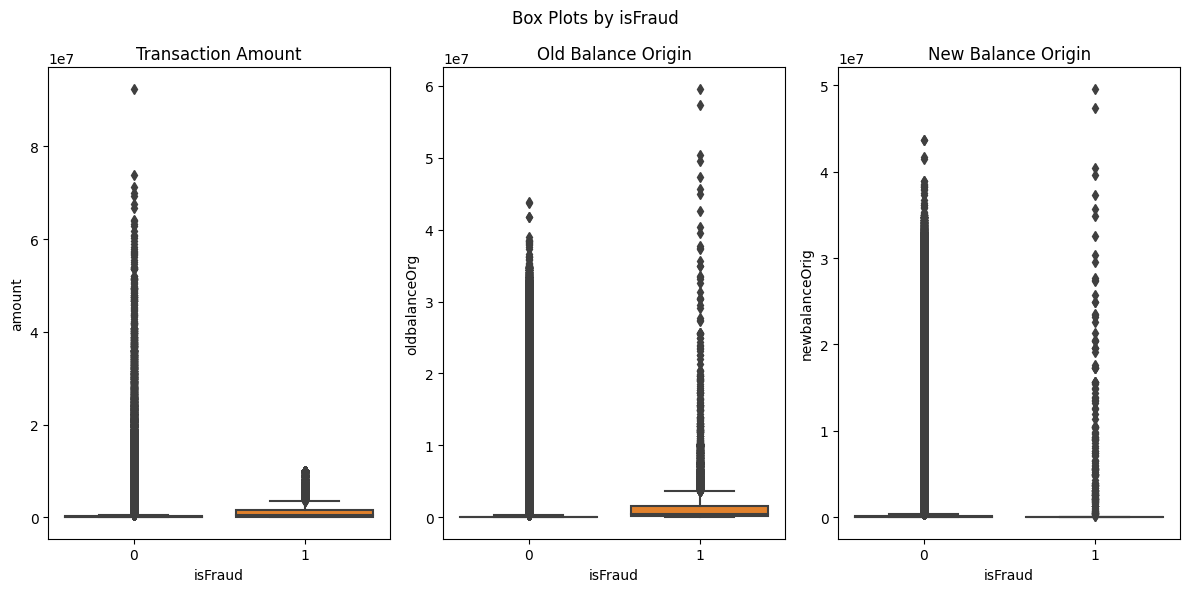

In [50]:
# Generating box plots for the 'amount,' 'oldbalanceOrg,' and 'newbalanceOrig' features, each broken down by whether the transactions are fraudulent or not ('isFraud')

# Setting the figure size
plt.figure(figsize=(12, 6))

# Creating box plots for 'amount', 'oldbalanceOrg', and 'newbalanceOrig' by 'isFraud'
plt.subplot(1, 3, 1)
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amount')

plt.subplot(1, 3, 2)
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=df)
plt.title('Old Balance Origin')

plt.subplot(1, 3, 3)
sns.boxplot(x='isFraud', y='newbalanceOrig', data=df)
plt.title('New Balance Origin')

# Adding a title to the overall figure
plt.suptitle('Box Plots by isFraud')

# Adjusting the layout
plt.tight_layout()

# Showing the plots
plt.show() 

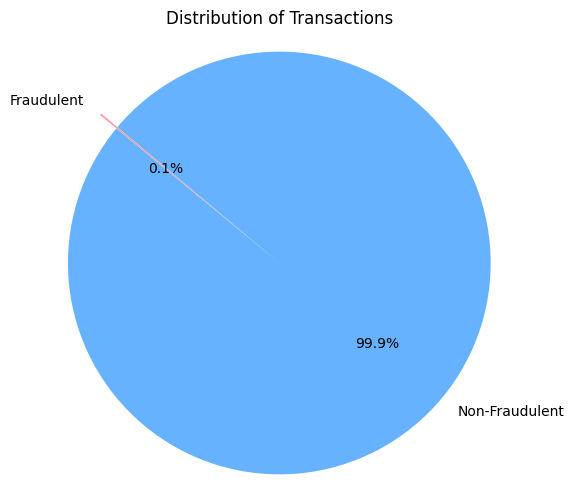

In [51]:
# Creating a Pie Chart to display the distribution of Fradulent and Non-fradulent transactions

# Counting the number of fraudulent and non-fraudulent transactions
fraudulent_count = df['isFraud'].sum()
non_fraudulent_count = len(df) - fraudulent_count

# Creating a list of counts
transaction_counts = [fraudulent_count, non_fraudulent_count]

# Labels for the two categories
labels = ['Fraudulent', 'Non-Fraudulent']

# Colors for the two categories
colors = ['#FF9999', '#66B2FF']

# Explode a slice if it is fraudulent
explode = (0.1, 0)

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(transaction_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Showing the pie chart
plt.show()
